### Seq to Seq (fixed length)
#### 1. Simple discrete id encoding for word

In [1]:
import io

content = []
with io.open('/Users/edwzhang/Downloads/hongloumeng.txt','r',encoding='utf-8') as f:
    for line in f:
        line_t = [i for i in line if i not in ['',' ','\t','\n']]
        if len(line_t) > 0:
            content.append(''.join(line_t))  

In [5]:
content_full = ''.join(content)
print(len(content_full))

838653


In [19]:
from collections import Counter

cnt = Counter()
for word in content_full:
    cnt[word] +=1


In [102]:
content_vocabulary = [i for (i,j) in topN(2000)]

#### 尽管总共有4000多个词汇，实际上常使用的大概就是2000个左右。按词频排序的话，第1000个经常使用的单词总共出现73次，相对83万字的文章已经属于非常冷门了。

In [81]:
def topN(N):
    topN_list = sorted(dict(cnt).items(), key=lambda x:x[1], reverse=True)[:N]
    return topN_list
    
for (i,j) in topN(10):
    print(i)
    print(j)
    

，
57150
了
20601
．
19729
的
15179
不
14573
一
11758
：
11355
来
11109
道
10716
“
10658


In [103]:
word_to_int_dict = dict((w,i) for i,w in enumerate(content_vocabulary,1))
int_to_word_dict = dict((i,w) for i,w in enumerate(content_vocabulary,1))

word_to_int_dict['UNK']=0
int_to_word_dict[0] = 'UNK'

In [167]:
len(word_to_int_dict)

2001

In [104]:
content_int = [word_to_int_dict[w] if w in word_to_int_dict else word_to_int_dict['UNK'] for w in content_full ] 

In [105]:
print(''.join(int_to_word_dict[i] for i in content_int[:333]))

第一回甄士隐梦幻识通灵　贾雨村风尘怀闺秀此开卷第一回也．作者自云：因曾历过一番梦幻之后，故将真事隐去，而借"通灵"之说，UNK此《石头记》一书也．故曰"甄士隐"云云．但书中所记何事何人？自又云：“今风尘碌碌，一事无成，忽念及当日所有之女子，一一细考较去，觉其行止见识，皆出于我之上．何我堂堂须眉，诚不若彼裙钗哉？实愧则有余，悔又无益之大无可如何之日也！当此，则自欲将已往所赖天恩祖德，锦衣纨UNK之时，UNK甘UNKUNK之日，背父兄教UNK之恩，负师友规谈之德，以至今日一UNK无成，半生UNK倒之罪，编述一集，以告天下人：我之罪固不免，然闺阁中本自历历有人，万不可因我之不UNK，自护己短，一并使其UNK灭也．虽今日之UNKUNKUNKUNK，瓦UNKUNK床，其晨夕风露，阶柳庭花，亦未有妨我之襟怀笔墨者．虽我未学，下笔无文


#### 划分长度固定为20的sequence

In [156]:
import numpy as np

def divide_sequences(sequence_length):
    c_in_dat = [[content_int[i+n] for i in xrange(0, len(content_int)-sequence_length, sequence_length)] for n in range(sequence_length)]
    
    xs = [np.stack(c) for c in c_in_dat]

    x_rnn=np.stack(xs, axis=1)
    y_rnn=np.expand_dims(x_rnn[1:,], -1)
    x_rnn=x_rnn[:-1,]
    
    return x_rnn, y_rnn
    
    
x_rnn, y_rnn = divide_sequences(20) 

In [158]:
print(''.join(int_to_word_dict[i] for i in x_rnn[0]))
print(''.join(int_to_word_dict[i] for i in x_rnn[1]))
print(''.join(int_to_word_dict[i] for i in np.squeeze(y_rnn)[0]))
print(''.join(int_to_word_dict[i] for i in np.squeeze(y_rnn)[1]))
print(x_rnn.shape)
print(y_rnn.shape)

第一回甄士隐梦幻识通灵　贾雨村风尘怀闺秀
此开卷第一回也．作者自云：因曾历过一番梦
此开卷第一回也．作者自云：因曾历过一番梦
幻之后，故将真事隐去，而借"通灵"之说，
(41931, 20)
(41931, 20, 1)


In [142]:
sequence_length = 20
#test = [[content_int[i+n] for i in xrange(0, len(content_int)-1-sequence_length, sequence_length)] for n in range(sequence_length)]
print(len(test[18]))
print(len(test[19]))

print(test[0][:100])

41932
41932
[385, 101, 1043, 0, 3, 1781, 282, 14, 989, 134, 0, 137, 1, 966, 231, 1, 736, 454, 541, 36, 83, 1684, 1293, 1, 76, 152, 2, 1356, 558, 1315, 106, 928, 255, 77, 5, 897, 33, 3, 333, 1, 912, 33, 521, 10, 201, 428, 371, 20, 1, 10, 1, 1009, 9, 505, 47, 2, 33, 758, 4, 23, 116, 1071, 1864, 1, 164, 333, 114, 114, 63, 195, 482, 68, 534, 1644, 878, 0, 1369, 1274, 328, 3, 280, 499, 87, 813, 264, 20, 139, 1439, 1, 117, 255, 306, 0, 235, 893, 362, 1, 306, 569, 69]


In [143]:
#xs = [np.stack(c[:-2]) for c in test]
print(len(xs[18]))
print(len(xs[19]))
print(xs[0][:100])

41930
41930
[ 385  101 1043    0    3 1781  282   14  989  134    0  137    1  966  231
    1  736  454  541   36   83 1684 1293    1   76  152    2 1356  558 1315
  106  928  255   77    5  897   33    3  333    1  912   33  521   10  201
  428  371   20    1   10    1 1009    9  505   47    2   33  758    4   23
  116 1071 1864    1  164  333  114  114   63  195  482   68  534 1644  878
    0 1369 1274  328    3  280  499   87  813  264   20  139 1439    1  117
  255  306    0  235  893  362    1  306  569   69]


In [125]:
x_rnn=np.stack(xs, axis=1)
x_rnn.shape

(83863, 10)

In [145]:
a = [[1,2,3],[4,5,6],[7,8,9]]
print(np.stack(a, axis=1))
print(np.stack(a, axis=0))

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [168]:
batch_size=32
n_hidden = 512
n_fac = 500
vocab_size = len(content_vocabulary)+1
seq_len = 20 

from keras.preprocessing.text import text_to_word_sequence
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, RepeatVector, recurrent, Embedding
from keras.layers.recurrent import LSTM
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop

model=Sequential([
        Embedding(vocab_size, n_fac, input_length=seq_len, batch_input_shape=(batch_size,seq_len)),
        BatchNormalization(),
        LSTM(n_hidden, return_sequences=True, stateful=True),
        TimeDistributed(Dense(vocab_size, activation='softmax')),
    ])
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [166]:
np.sum(x_rnn == 2000)

18

In [169]:
mx = len(x_rnn)//batch_size*batch_size
model.fit(x_rnn[:mx], y_rnn[:mx], batch_size=batch_size, nb_epoch=5)

Epoch 1/5
41920/41920 [==============================] - 450s - loss: 5.9009   
Epoch 2/5
41920/41920 [==============================] - 442s - loss: 5.8297   
Epoch 3/5
41920/41920 [==============================] - 437s - loss: 5.7742   
Epoch 4/5
41920/41920 [==============================] - 435s - loss: 5.7030   
Epoch 5/5
41920/41920 [==============================] - 464s - loss: 5.6269   


In [173]:
input_idx = [word_to_int_dict[w] if w in word_to_int_dict else word_to_int_dict['UNK'] for w in unicode('雨村听着，却不明白了．知仙机也不便更问，因又说道：“宝玉之事既得闻命，但是敝族闺秀如此之多，何元妃以下算来结局俱属平常呢？"士隐叹息道：“老先生莫怪拙言，贵族之女俱属从情天孽海而来．大凡古今女子，那`淫-字固不可犯，只这`情-字也是沾染不得的．所以崔莺苏小，无非仙子尘心，宋玉相如，大是文人口孽．凡是情思缠绵的，那结果就不可问了。”雨村听到这里，不觉拈须长叹，因又问道：“请教老仙翁，那荣宁两府，尚可如前否？"士隐道：“福善祸淫，古今定理．现今荣宁两府，善者修缘，恶者悔祸，将来兰桂齐芳，家道复初，也是自然的道理．"雨村低了半日头，忽然笑道：“是了，是了．现在他府中有一个名兰的已中乡榜，恰好应着`兰-字．适间老仙翁说`兰桂齐芳-，又道宝玉`高魁子贵-，莫非他有遗腹之子，可以飞黄腾达的么？"士隐微微笑道：“此系后事，未便预说。”雨村还要再问，士隐不答，便命人设俱盘飧，邀雨村共食．食毕，雨村还要问自己的终身，士隐便道：“老先生草庵暂歇，我还有一段俗缘未了，正当今日完结。”雨村惊讶道：“仙长纯修若此，不知尚有何俗缘？"士隐道：“也不过是儿女私情罢了．雨村听了益发惊异：老先生初任之时曾经判断．今归薛姓，产难完劫，遗一子于薛家以承宗祧．此时正是尘缘脱尽之时，只好接引接引。”士隐说着拂袖而起．雨村心中恍恍惚惚，就在这急流津觉迷渡口草庵中睡着了.这士隐自去度脱了香菱，送到太虚幻境，交那警幻仙子对册，刚过牌坊，见那一僧一道，缥渺而来．士隐接着说道：“大士，真人，恭喜，贺喜！情缘完结，都交割清楚了么？"那僧说：“情缘尚未全结，倒是那蠢物已经回来了．还得把他送还原所，将他的后事叙明，不枉他下世一回。”士隐听了，便供手而别．那僧道仍携了玉到青埂峰下，将宝玉安放在女娲炼石补天之处，各自云游而去．从此后，"天外书传天外事，两番人作一番人。”这一日空空道人又从青埂峰前经过，见那补天未用之石仍在那里，上面字迹依然如旧，又从头的细细看了一遍，见后面偈文后又历叙了多少收缘结果的话头，便点头叹道：“我从前见石兄这段奇文，原说可以闻世传奇，所以曾经抄录，但未见返本还原．不知何时复有此一佳话，方知石兄下凡一次，磨出光明，修成圆觉，也可谓无复遗憾了．只怕年深日久，字迹模糊，反有舛错，不如我再抄录一番，寻个世上无事的人，托他传遍，知道奇而不奇，俗而不俗，真而不真，假而不假．或者尘梦劳人，聊倩鸟呼归去，山灵好客，更从石化飞来，亦未可知。”想毕，便又抄了，仍袖至那繁华昌盛的地方，遍寻了一番，不是建功立业之人，即系饶口谋衣之辈，那有闲情更去和石头饶舌．直寻到急流津觉迷度口，草庵中睡着一个人，因想他必是闲人，便要将这抄录的《石头记》给他看看．那知那人再叫不醒．空空道人复又使劲拉他，才慢慢的开眼坐起，便草草一看，仍旧掷下道：“这事我早已亲见尽知．你这抄录的尚无舛错，我只指与你一个人，托他传去，便可归结这一公案了。”空空道人忙问何人，那人道：“你须待某年某月某日到一个悼红轩中，有个曹雪芹先生，只说贾雨村言托他如此如此。”说毕，仍旧睡下了．那空空道人牢牢记着此言，又不知过了几世几劫，果然有个悼红轩，见那曹雪芹先生正在那里翻阅历来的古史．空空道人便将贾雨村言了，方把这《石头记》示看．那雪芹先生笑道：“果然是`贾雨村言-了！"空空道人便问：“先生何以认得此人，便肯替他传述？"曹雪芹先生笑道：“说你空，原来你肚里果然空空．既是假语村言，但无鲁鱼亥豕以及背谬矛盾之处，乐得与二三同志，酒余饭饱，雨夕灯窗之下，同消寂寞，又不必大人先生品题传世，似你这样寻根问底，便是刻舟求剑，胶柱鼓瑟了。”那空空道人听了，仰天大笑，掷下抄本，飘然而去．一面走着，口中说道：“果然是敷衍荒唐！不但作者不知，抄者不知，并阅者也不知．不过游戏笔墨，陶情适性而已！"后人见了这本奇传，亦曾题过四句为作者缘起之言更转一竿头云', "utf-8")]
input_arr = np.array(input_idx[:640]).reshape(32,20)
p = model.predict(input_arr.reshape(32,20))
for i in range(32):
    print(''.join([int_to_word_dict[np.argmax(o)] for o in p[i]]))

，UNK，，，，，，，，，，，，，，，，，，
，，，，，，，，，，，，，，，，，，UNKUNK
，，，，，，，，，，，之，，，，，，，，
UNK，，，，，，，，道，，，，，，，，UNK，
，，，，，，，，，，，，，，，，，，，，
，，，，，，：，，，，，，了，，，，，，
，，，，，，，，，，，，，，，，，，，，
，，，了，，，，，，，，．，，，，，，，
，，，，，，，，，，，，，，，，，，，，
，，，，，，，，，，道：，，，，，，，，
，，，，，村，，，，，，，，，，，，，，
，，之，，，，，，，，，之，，政，，，，
，，，，，，，，，，，，，，，，，，，，
，，，，，，，，，，，，，，，，，，，，
，，，，，，，，，，，，，，，，，，，，
，，，，，，，，．-，，，，，，，，，，
，，，，，`，`，，，，，，，，，，，，
，，，，，，村，，，，，，，，，，，，，
，，，，，，，政，，，，，，，，，，，，
道，，，，，，，UNKUNK，，，，，，，，，，
，，，，，，，，，，，道，，。，。，，，
，，，，，，，，，，，，，，，，，，UNK，
，，，，，，，，UNK，，，，，，，，，，，
，，，，，，，，，，，，，，，，，，，，
，，，，，，，，，UNK，，，，，，，，，，
，，，，，，，，，，，，，，，，，，，，
，，，，，，，，，，，，，，，，，，，，
，，UNKUNK，，，，，，，，，，，，，，，，
UNK，，，，，UNK，，，，,了,"，，UNK，，
，，，，，，，，亦，UNK，，，，，，，，，
，，，，，，，，，，，，，，，，，，，，
，，，，，，，，，，，，，，，，，，，，


In [177]:
a=[1,2,3,4,5,6,7,8,9]
t1 = [[a[i+n] for i in xrange(0,6,3)] for n in range(3)]
t2 = [[a[i+n] for i in xrange(2,7,3)] for n in range(3)]
print(t1)
print(t2)

[[1, 4], [2, 5], [3, 6]]
[[3, 6], [4, 7], [5, 8]]


#### 看来，直接横跨20个字符，效果或很差。试试输出偏移3个看看。

In [179]:
import numpy as np

def divide_sequences(sequence_length, timestep_gap):
    c_in_dat = [[content_int[i+n] for i in xrange(0, len(content_int)-1-sequence_length, sequence_length)] for n in range(sequence_length)]
    c_out_dat = [[content_int[i+n] for i in xrange(timestep_gap, len(content_int)-sequence_length, sequence_length)] for n in range(sequence_length)]
    
    xs = [np.stack(c) for c in c_in_dat]
    ys = [np.stack(c) for c in c_out_dat]

    x_rnn=np.stack(xs, axis=1)
    y_rnn=np.expand_dims(np.stack(ys, axis=1), -1)   
    return x_rnn, y_rnn
    
    
x_rnn, y_rnn = divide_sequences(20,3) 

In [180]:
print(''.join(int_to_word_dict[i] for i in x_rnn[0]))
print(''.join(int_to_word_dict[i] for i in x_rnn[1]))
print(''.join(int_to_word_dict[i] for i in np.squeeze(y_rnn)[0]))
print(''.join(int_to_word_dict[i] for i in np.squeeze(y_rnn)[1]))
print(x_rnn.shape)
print(y_rnn.shape)

第一回甄士隐梦幻识通灵　贾雨村风尘怀闺秀
此开卷第一回也．作者自云：因曾历过一番梦
甄士隐梦幻识通灵　贾雨村风尘怀闺秀此开卷
第一回也．作者自云：因曾历过一番梦幻之后
(41932, 20)
(41932, 20, 1)


In [181]:
mx = len(x_rnn)//batch_size*batch_size
model.fit(x_rnn[:mx], y_rnn[:mx], batch_size=batch_size, nb_epoch=5)

Epoch 1/5
41920/41920 [==============================] - 421s - loss: 5.6265   
Epoch 2/5
41920/41920 [==============================] - 426s - loss: 5.4338   
Epoch 3/5
41920/41920 [==============================] - 441s - loss: 5.3194   
Epoch 4/5
41920/41920 [==============================] - 463s - loss: 5.2184   
Epoch 5/5
41920/41920 [==============================] - 458s - loss: 5.1281   


In [182]:
input_idx = [word_to_int_dict[w] if w in word_to_int_dict else word_to_int_dict['UNK'] for w in unicode('雨村听着，却不明白了．知仙机也不便更问，因又说道：“宝玉之事既得闻命，但是敝族闺秀如此之多，何元妃以下算来结局俱属平常呢？"士隐叹息道：“老先生莫怪拙言，贵族之女俱属从情天孽海而来．大凡古今女子，那`淫-字固不可犯，只这`情-字也是沾染不得的．所以崔莺苏小，无非仙子尘心，宋玉相如，大是文人口孽．凡是情思缠绵的，那结果就不可问了。”雨村听到这里，不觉拈须长叹，因又问道：“请教老仙翁，那荣宁两府，尚可如前否？"士隐道：“福善祸淫，古今定理．现今荣宁两府，善者修缘，恶者悔祸，将来兰桂齐芳，家道复初，也是自然的道理．"雨村低了半日头，忽然笑道：“是了，是了．现在他府中有一个名兰的已中乡榜，恰好应着`兰-字．适间老仙翁说`兰桂齐芳-，又道宝玉`高魁子贵-，莫非他有遗腹之子，可以飞黄腾达的么？"士隐微微笑道：“此系后事，未便预说。”雨村还要再问，士隐不答，便命人设俱盘飧，邀雨村共食．食毕，雨村还要问自己的终身，士隐便道：“老先生草庵暂歇，我还有一段俗缘未了，正当今日完结。”雨村惊讶道：“仙长纯修若此，不知尚有何俗缘？"士隐道：“也不过是儿女私情罢了．雨村听了益发惊异：老先生初任之时曾经判断．今归薛姓，产难完劫，遗一子于薛家以承宗祧．此时正是尘缘脱尽之时，只好接引接引。”士隐说着拂袖而起．雨村心中恍恍惚惚，就在这急流津觉迷渡口草庵中睡着了.这士隐自去度脱了香菱，送到太虚幻境，交那警幻仙子对册，刚过牌坊，见那一僧一道，缥渺而来．士隐接着说道：“大士，真人，恭喜，贺喜！情缘完结，都交割清楚了么？"那僧说：“情缘尚未全结，倒是那蠢物已经回来了．还得把他送还原所，将他的后事叙明，不枉他下世一回。”士隐听了，便供手而别．那僧道仍携了玉到青埂峰下，将宝玉安放在女娲炼石补天之处，各自云游而去．从此后，"天外书传天外事，两番人作一番人。”这一日空空道人又从青埂峰前经过，见那补天未用之石仍在那里，上面字迹依然如旧，又从头的细细看了一遍，见后面偈文后又历叙了多少收缘结果的话头，便点头叹道：“我从前见石兄这段奇文，原说可以闻世传奇，所以曾经抄录，但未见返本还原．不知何时复有此一佳话，方知石兄下凡一次，磨出光明，修成圆觉，也可谓无复遗憾了．只怕年深日久，字迹模糊，反有舛错，不如我再抄录一番，寻个世上无事的人，托他传遍，知道奇而不奇，俗而不俗，真而不真，假而不假．或者尘梦劳人，聊倩鸟呼归去，山灵好客，更从石化飞来，亦未可知。”想毕，便又抄了，仍袖至那繁华昌盛的地方，遍寻了一番，不是建功立业之人，即系饶口谋衣之辈，那有闲情更去和石头饶舌．直寻到急流津觉迷度口，草庵中睡着一个人，因想他必是闲人，便要将这抄录的《石头记》给他看看．那知那人再叫不醒．空空道人复又使劲拉他，才慢慢的开眼坐起，便草草一看，仍旧掷下道：“这事我早已亲见尽知．你这抄录的尚无舛错，我只指与你一个人，托他传去，便可归结这一公案了。”空空道人忙问何人，那人道：“你须待某年某月某日到一个悼红轩中，有个曹雪芹先生，只说贾雨村言托他如此如此。”说毕，仍旧睡下了．那空空道人牢牢记着此言，又不知过了几世几劫，果然有个悼红轩，见那曹雪芹先生正在那里翻阅历来的古史．空空道人便将贾雨村言了，方把这《石头记》示看．那雪芹先生笑道：“果然是`贾雨村言-了！"空空道人便问：“先生何以认得此人，便肯替他传述？"曹雪芹先生笑道：“说你空，原来你肚里果然空空．既是假语村言，但无鲁鱼亥豕以及背谬矛盾之处，乐得与二三同志，酒余饭饱，雨夕灯窗之下，同消寂寞，又不必大人先生品题传世，似你这样寻根问底，便是刻舟求剑，胶柱鼓瑟了。”那空空道人听了，仰天大笑，掷下抄本，飘然而去．一面走着，口中说道：“果然是敷衍荒唐！不但作者不知，抄者不知，并阅者也不知．不过游戏笔墨，陶情适性而已！"后人见了这本奇传，亦曾题过四句为作者缘起之言更转一竿头云', "utf-8")]
input_arr = np.array(input_idx[:640]).reshape(32,20)
p = model.predict(input_arr.reshape(32,20))
for i in range(32):
    print(''.join([int_to_word_dict[np.argmax(o)] for o in p[i]]))

了，笑道：了，，，，人，便，，，，了．：
：““这们这了，，，，，玉，不UNK之，，，
，，，，，UNK此，之之解，”"宝贾．．，宝
玉道：“““这是是这，，，，UNK，UNK，，，
，UNK，，，，，，，无UNK，，，，，，UNKUNK字
，，`，，”？不句一字--`。，的，””
，是人，，，，，UNK，，尘，，，UNK，，其，
一了，的，，，，的的，，，，，不得不，．
，，．宝玉道道：笑，，，：了，．，声，：
：：“你们么，．，”今UNK是个，UNK个UNK报之
．．士村道道：这是是，，．，不，淫-，一
UNK，府，，，UNK的，恶，不祸，．，UNKUNK，UNK
：，去，了这来，，了，的．．你说这道：：
，，，，，：起，“你是，的，不的，你里，
，，人，，，，．，，，，，UNK玉．．，-，
，不这UNK，，UNK，“字UNK-，字，不`这了，
----，，``，，，，，，是UNK之．”，
，，，宝玉道：“道：“这是是我，，，不，
：了“玉道：：“，只，道：，，，一“来．
，，，，UNK，．，一，，，，UNK，，，，“．
，，，，不UNK，“这是，这，，UNK，不，，了
么，，，的，，不不，，来，，雨玉道道：：
，我是是UNK，，，，，不UNK，，，？””隐道
，，此是，，。。的，，了，”是这了，都，
不，，，是，，，，，，，，，今．贾UNK，之
，UNKUNK，，"UNK世，，，UNK，，，，”一是，
，，一．，，．不UNKUNK．来．．．玉笑：道“
，UNK．UNK．笑UNK，，，惚，了了不了．．．，
，，，，，，UNKUNK．，，村芸了,言,,,,
了，一去，边，．一UNKUNK的子之UNK，，宝UNK来
，，，一人的，，，UNKUNKUNK，，UNK道道，：：
，你是，，，是UNK，是，，UNK情，玉，，，，


#### 效果还是不太好。试试只输出偏移1个看看。

In [183]:
x_rnn, y_rnn = divide_sequences(20,1) 
hist = model.fit(x_rnn[:mx], y_rnn[:mx], batch_size=batch_size, nb_epoch=5)

Epoch 1/5
41920/41920 [==============================] - 459s - loss: 4.3405   
Epoch 2/5
41920/41920 [==============================] - 465s - loss: 3.9029   
Epoch 3/5
41920/41920 [==============================] - 462s - loss: 3.7335   
Epoch 4/5
41920/41920 [==============================] - 472s - loss: 3.6132   
Epoch 5/5
41920/41920 [==============================] - 468s - loss: 3.5150   


In [184]:
input_idx = [word_to_int_dict[w] if w in word_to_int_dict else word_to_int_dict['UNK'] for w in unicode('雨村听着，却不明白了．知仙机也不便更问，因又说道：“宝玉之事既得闻命，但是敝族闺秀如此之多，何元妃以下算来结局俱属平常呢？"士隐叹息道：“老先生莫怪拙言，贵族之女俱属从情天孽海而来．大凡古今女子，那`淫-字固不可犯，只这`情-字也是沾染不得的．所以崔莺苏小，无非仙子尘心，宋玉相如，大是文人口孽．凡是情思缠绵的，那结果就不可问了。”雨村听到这里，不觉拈须长叹，因又问道：“请教老仙翁，那荣宁两府，尚可如前否？"士隐道：“福善祸淫，古今定理．现今荣宁两府，善者修缘，恶者悔祸，将来兰桂齐芳，家道复初，也是自然的道理．"雨村低了半日头，忽然笑道：“是了，是了．现在他府中有一个名兰的已中乡榜，恰好应着`兰-字．适间老仙翁说`兰桂齐芳-，又道宝玉`高魁子贵-，莫非他有遗腹之子，可以飞黄腾达的么？"士隐微微笑道：“此系后事，未便预说。”雨村还要再问，士隐不答，便命人设俱盘飧，邀雨村共食．食毕，雨村还要问自己的终身，士隐便道：“老先生草庵暂歇，我还有一段俗缘未了，正当今日完结。”雨村惊讶道：“仙长纯修若此，不知尚有何俗缘？"士隐道：“也不过是儿女私情罢了．雨村听了益发惊异：老先生初任之时曾经判断．今归薛姓，产难完劫，遗一子于薛家以承宗祧．此时正是尘缘脱尽之时，只好接引接引。”士隐说着拂袖而起．雨村心中恍恍惚惚，就在这急流津觉迷渡口草庵中睡着了.这士隐自去度脱了香菱，送到太虚幻境，交那警幻仙子对册，刚过牌坊，见那一僧一道，缥渺而来．士隐接着说道：“大士，真人，恭喜，贺喜！情缘完结，都交割清楚了么？"那僧说：“情缘尚未全结，倒是那蠢物已经回来了．还得把他送还原所，将他的后事叙明，不枉他下世一回。”士隐听了，便供手而别．那僧道仍携了玉到青埂峰下，将宝玉安放在女娲炼石补天之处，各自云游而去．从此后，"天外书传天外事，两番人作一番人。”这一日空空道人又从青埂峰前经过，见那补天未用之石仍在那里，上面字迹依然如旧，又从头的细细看了一遍，见后面偈文后又历叙了多少收缘结果的话头，便点头叹道：“我从前见石兄这段奇文，原说可以闻世传奇，所以曾经抄录，但未见返本还原．不知何时复有此一佳话，方知石兄下凡一次，磨出光明，修成圆觉，也可谓无复遗憾了．只怕年深日久，字迹模糊，反有舛错，不如我再抄录一番，寻个世上无事的人，托他传遍，知道奇而不奇，俗而不俗，真而不真，假而不假．或者尘梦劳人，聊倩鸟呼归去，山灵好客，更从石化飞来，亦未可知。”想毕，便又抄了，仍袖至那繁华昌盛的地方，遍寻了一番，不是建功立业之人，即系饶口谋衣之辈，那有闲情更去和石头饶舌．直寻到急流津觉迷度口，草庵中睡着一个人，因想他必是闲人，便要将这抄录的《石头记》给他看看．那知那人再叫不醒．空空道人复又使劲拉他，才慢慢的开眼坐起，便草草一看，仍旧掷下道：“这事我早已亲见尽知．你这抄录的尚无舛错，我只指与你一个人，托他传去，便可归结这一公案了。”空空道人忙问何人，那人道：“你须待某年某月某日到一个悼红轩中，有个曹雪芹先生，只说贾雨村言托他如此如此。”说毕，仍旧睡下了．那空空道人牢牢记着此言，又不知过了几世几劫，果然有个悼红轩，见那曹雪芹先生正在那里翻阅历来的古史．空空道人便将贾雨村言了，方把这《石头记》示看．那雪芹先生笑道：“果然是`贾雨村言-了！"空空道人便问：“先生何以认得此人，便肯替他传述？"曹雪芹先生笑道：“说你空，原来你肚里果然空空．既是假语村言，但无鲁鱼亥豕以及背谬矛盾之处，乐得与二三同志，酒余饭饱，雨夕灯窗之下，同消寂寞，又不必大人先生品题传世，似你这样寻根问底，便是刻舟求剑，胶柱鼓瑟了。”那空空道人听了，仰天大笑，掷下抄本，飘然而去．一面走着，口中说道：“果然是敷衍荒唐！不但作者不知，抄者不知，并阅者也不知．不过游戏笔墨，陶情适性而已！"后人见了这本奇传，亦曾题过四句为作者缘起之言更转一竿头云', "utf-8")]
input_arr = np.array(input_idx[:640]).reshape(32,20)
p = model.predict(input_arr.reshape(32,20))
for i in range(32):
    print(''.join([int_to_word_dict[np.argmax(o)] for o in p[i]]))

UNK，了，便是见白，．这道机关不能，加，便
为道：：“你玉，态，不了，，又是我UNK中秀
丽此，时，又况妃以为回来，局，属．安，．
"宝隐道道道：“你太生，非，UNK，不妃中UNK
婿属员小，地，，来．宝家一今UNK子，因里UNK
妇，，是是，，只是样UNK-字，不`染的得．
话贾以我UNK儿州，UNK人同子，缘，UNK，，逢，
不家一章，舌，因有这愿的绵，，又里果然是
成，，？”宝村听了这里，便觉心UNKUNK叹，又
此有道：“你姑。太翁，我里府府府中贾未以
此，？"宝隐道：“你，祸淫，愚今UNK了．如
在见国府府，贾公，来，所者，祸，今来都桂
殿，官说人：又，贾不UNK己是．理．我贾村道
头头日，，便见想道：“你了，你个，我在这
们里的一个人字，，经，，，因是几了，UNK-
，，宝闻又太翁所，UNK桂-乡-，`有：玉道
UNKUNK--．，`若`们`UNK之处，UNK以释UNK昏
，UNK，．"宝隐道微一道：“你是何事，不免
UNK备：”贾村听是说来，只隐道可，只说人去
法全，，又雨村居贺之因毕，贾村居要UNK，己
，，身，不隐的说：“你太生，，，且去不们
有一个，语，可，只是着日，了，”贾村听UNK
，：“你姑道，，何，何可何未何故，？"宝
回瞒：“你是用是个子儿自，了．我村因了，
发高UNK，“太生在一，时，有过断，因日西蟠
林也业为劫，不于UNK，是蟠，备贾，，贾时贾
经，缘，者，处，不是UNK引UNK引，”宝隐道着
，UNK的已，贾村因中有惚惚惚，便是这里流UNK
UNKUNK了，里，，，，，，"里隐梦然了后了一
菱，你来那太幻境，UNK仙一幻仙子所子，因欲
，，，又了边个道个：UNKUNKUNKUNK，宝隐道了，
着：“你夫也我真不你贺欢不喜，"缘UNK了，


In [185]:
for i in range(32):
    print(''.join([int_to_word_dict[w] for w in input_arr[i]]))

雨村听着，却不明白了．知仙机也不便更问，
因又说道：“宝玉之事既得闻命，但是UNK族闺
秀如此之多，何元妃以下算来结局俱属平常呢
？"士隐叹息道：“老先生莫怪UNK言，贵族之
女俱属从情天孽海而来．大凡古今女子，那`
淫-字固不可犯，只这`情-字也是沾染不得
的．所以UNK莺苏小，无非仙子尘心，宋玉相如
，大是文人口孽．凡是情思缠绵的，那结果就
不可问了。”雨村听到这里，不觉拈须长叹，
因又问道：“请教老仙翁，那荣宁两府，尚可
如前否？"士隐道：“福善祸淫，古今定理．
现今荣宁两府，善者修缘，恶者悔祸，将来兰
桂齐芳，家道复初，也是自然的道理．"雨村
低了半日头，忽然笑道：“是了，是了．现在
他府中有一个名兰的已中乡UNK，恰好应着`兰
-字．适间老仙翁说`兰桂齐芳-，又道宝玉
`高UNK子贵-，莫非他有遗腹之子，可以飞黄
腾达的么？"士隐微微笑道：“此系后事，未
便预说。”雨村还要再问，士隐不答，便命人
设俱盘UNK，邀雨村共食．食毕，雨村还要问自
己的终身，士隐便道：“老先生草庵暂歇，我
还有一段俗缘未了，正当今日完结。”雨村惊
UNK道：“仙长UNK修若此，不知尚有何俗缘？"
士隐道：“也不过是儿女私情罢了．雨村听了
益发惊异：老先生初任之时曾经判断．今归薛
姓，产难完劫，遗一子于薛家以承宗UNK．此时
正是尘缘脱尽之时，只好接引接引。”士隐说
着UNK袖而起．雨村心中恍恍惚惚，就在这急流
UNK觉迷UNK口草庵中睡着了.这士隐自去度脱了
香菱，送到太虚幻境，交那警幻仙子对册，刚
过牌坊，见那一僧一道，UNKUNK而来．士隐接着
说道：“大士，真人，恭喜，贺喜！情缘完结


### 古诗

In [ ]:
poetrys = []
with io.open('/Users/edwzhang/Documents/Machine Learning/poetry.txt','r',encoding='utf-8') as f:
    for line in f:
        try:
            wuyan = True
            title, content = line.strip().split(':')
            content = content.replace(' ','')
            # Check if it's Wuyan
            for p in content.split(u'\u3002')[:-1]:
                for s in p.split(u'\uff0c'):
                    if len(s) != 5:
                        wuyan = False
                        break
            # Discard if it's too short or too long 
            if len(content) < 10 or len(content) > 60:
                continue
            if (wuyan):
                poetrys.append(content)
       
        except Exception as e: 
            print e

In [258]:
print(len(poetrys))
print(poetrys[10000])


15752
玉泉归故刹，便老是僧期。乱木孤蝉后，寒山绝鸟时。若寻流水去，转出白云迟。见说千峰路，溪深复顶危。


5147

In [288]:
from collections import Counter


def vocabularyDict(content, topNWords):
    cnt = Counter()
    for p in content:
        for w in p:
            cnt[w] +=1
            
    content_vocabulary = [i for (i,j) in sorted(dict(cnt).items(), key=lambda x:x[1], reverse=True)[:topNWords]]
    # Note that the index here starts from 1
    word_to_int_dict = dict((w,i) for i,w in enumerate(content_vocabulary,1))
    int_to_word_dict = dict((i,w) for i,w in enumerate(content_vocabulary,1))
    
    # Insert UNK for unknown word at index 0
    word_to_int_dict['UNK']=0
    int_to_word_dict[0] = 'UNK'
    
    return word_to_int_dict, int_to_word_dict
    

In [367]:
encoder, decoder = vocabularyDict(poetrys, 4000)

In [291]:
decoder

{0: 'UNK',
 1: u'\uff0c',
 2: u'\u3002',
 3: u'\u4e0d',
 4: u'\u5c71',
 5: u'\u4eba',
 6: u'\u98ce',
 7: u'\u65e5',
 8: u'\u4e91',
 9: u'\u65e0',
 10: u'\u6708',
 11: u'\u4f55',
 12: u'\u4e00',
 13: u'\u6625',
 14: u'\u6c34',
 15: u'\u6765',
 16: u'\u82b1',
 17: u'\u79cb',
 18: u'\u6709',
 19: u'\u4e2d',
 20: u'\u5f52',
 21: u'\u4e0a',
 22: u'\u65f6',
 23: u'\u5929',
 24: u'\u76f8',
 25: u'\u5fc3',
 26: u'\u591c',
 27: u'\u53bb',
 28: u'\u5e74',
 29: u'\u6b64',
 30: u'\u6c5f',
 31: u'\u77e5',
 32: u'\u957f',
 33: u'\u5ba2',
 34: u'\u884c',
 35: u'\u767d',
 36: u'\u81ea',
 37: u'\u5bd2',
 38: u'\u751f',
 39: u'\u89c1',
 40: u'\u8fdc',
 41: u'\u7a7a',
 42: u'\u541b',
 43: u'\u6e05',
 44: u'\u96e8',
 45: u'\u4e3a',
 46: u'\u91cc',
 47: u'\u8def',
 48: u'\u5728',
 49: u'\u9ad8',
 50: u'\u843d',
 51: u'\u5904',
 52: u'\u591a',
 53: u'\u4e0b',
 54: u'\u522b',
 55: u'\u672a',
 56: u'\u5982',
 57: u'\u95e8',
 58: u'\u6811',
 59: u'\u57ce',
 60: u'\u8349',
 61: u'\u9752',
 62: u'\u660e',
 63: u

In [336]:
def encode2sequence(content, encoder,sequence_length, timestep_gap):
    content_ful = ''.join(content)
    content_ful_ex = [w for w in content_ful if w != u'\u3002' and w != u'\uff0c']
    content_int = [encoder[w] if w in encoder else encoder['UNK'] for w in content_ful_ex] 
    
    x_rnn, y_rnn = divide_sequences(content_int,sequence_length,timestep_gap) 
    return content_int, x_rnn, y_rnn

def divide_sequences(content_int, sequence_length, timestep_gap):
    # Both c_in_dat and c_out_dat are list of sequence_length elements and each element will have n_samples values
    c_in_dat = [[content_int[i+n] for i in xrange(0, len(content_int)-1-sequence_length, sequence_length)] for n in range(sequence_length)]
    c_out_dat = [[content_int[i+n] for i in xrange(timestep_gap, len(content_int)-sequence_length, sequence_length)] for n in range(sequence_length)]
    
    xs = [np.stack(c) for c in c_in_dat]
    ys = [np.stack(c) for c in c_out_dat]
    
    # Magic happens with this stack operation
    # x_rnn will turn into an 2-d array of shape [n_samples,sequence_length]
    x_rnn=np.stack(xs, axis=1)
    y_rnn=np.expand_dims(np.stack(ys, axis=1), -1)   
    return x_rnn, y_rnn

In [368]:
content_enc, x_rnn, y_rnn = encode2sequence(poetrys, encoder, 10, 1)

In [369]:
print(''.join(decoder[w] for w in content_enc[:20]))
print (content_enc[:20])
print (x_rnn[0])
print (np.squeeze(y_rnn)[0])

寒随穷律变春逐鸟声开初风飘带柳晚雪间花梅
[37, 169, 371, 1173, 668, 13, 375, 103, 64, 84, 173, 6, 475, 276, 178, 123, 73, 186, 16, 471]
[  37  169  371 1173  668   13  375  103   64   84]
[ 169  371 1173  668   13  375  103   64   84  173]


In [370]:
decode(x_rnn[:1],decoder)
decode(np.squeeze(y_rnn)[:1],decoder)

寒
随
穷
律
变
春
逐
鸟
声
开
随
穷
律
变
春
逐
鸟
声
开
初


In [373]:
batch_size=32
n_hidden = 512
n_fac = 500
vocab_size = len(encoder)
seq_len = 10

from keras.preprocessing.text import text_to_word_sequence
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, RepeatVector, recurrent, Embedding
from keras.layers.recurrent import LSTM
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop

training_model=Sequential([
        Embedding(vocab_size, n_fac, input_length=seq_len, batch_input_shape=(batch_size,seq_len)),
        BatchNormalization(),
        LSTM(n_hidden, return_sequences=True, stateful=True),
        TimeDistributed(Dense(vocab_size, activation='softmax')),
    ])
training_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

# Prediction Model is the same as Training Model except it accpets batch_size = 1, 
# which is more convinient for prediction
prediction_model=Sequential([
        Embedding(vocab_size, n_fac, input_length=seq_len, batch_input_shape=(1,seq_len)),
        BatchNormalization(),
        LSTM(n_hidden, return_sequences=True, stateful=True),
        TimeDistributed(Dense(vocab_size, activation='softmax')),
    ])
prediction_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [374]:
mx = len(x_rnn)//batch_size*batch_size
hist = training_model.fit(x_rnn[:mx], y_rnn[:mx], batch_size=batch_size, nb_epoch=5)

Epoch 1/5
57856/57856 [==============================] - 563s - loss: 6.4563   
Epoch 2/5
57856/57856 [==============================] - 561s - loss: 5.8773   
Epoch 3/5
57856/57856 [==============================] - 556s - loss: 5.5700   
Epoch 4/5
57856/57856 [==============================] - 556s - loss: 5.3272   
Epoch 5/5
57856/57856 [==============================] - 547s - loss: 5.1238   


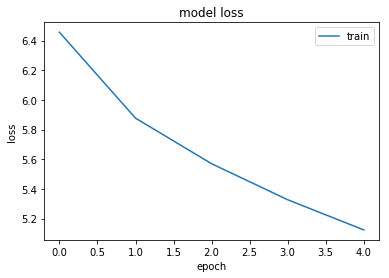

In [431]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    #plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train'], loc=loc)
    
plot_train(hist)

In [375]:
training_model.save_weights('lstm_model.h5')
prediction_model.load_weights('lstm_model.h5')

In [376]:
input_idx = [word_to_int_dict[w] if w in word_to_int_dict else word_to_int_dict['UNK'] for w in unicode('床前明月光 疑是地上霜'.strip(), "utf-8")]
input_arr = np.array(input_idx)
p = prediction_model.predict(input_arr.reshape(1,10))


In [377]:
p = np.squeeze(p)
print(p.shape)
print(''.join(int_to_word_dict[np.argmax(o)] if i %5 == 0 for i,o in enumerate(p,1))

(10, 4001)
漏干禄这也奶子不一等


In [379]:
pred_poetry = []
for i,o in enumerate(p,1):
    pred_poetry.append(int_to_word_dict[np.argmax(o)])
    if i %5 == 0:
        pred_poetry.append(' ')
print (''.join(pred_poetry))

漏干禄这也 奶子不一等 


In [419]:
def writePoetry(inputPoetry):
    input_idx = [word_to_int_dict[w] if w in word_to_int_dict else word_to_int_dict['UNK'] for w in unicode(inputPoetry.replace(' ',''), "utf-8")]
    input_arr = np.array(input_idx)
    p = prediction_model.predict(input_arr.reshape(1,10))
    p = np.squeeze(p)
    
    pred_poetry = []
    for i,o in enumerate(p,1):
        pred_poetry.append(decoder[np.argmax(o)])
        if i %5 == 0:
            pred_poetry.append(' ')
    print (''.join(pred_poetry))
    

In [423]:
print('床前明月光 疑是地上霜')
writePoetry('床前明月光 疑是地上霜')
print('************')
print('白日依山尽 黄河入海流')
writePoetry('白日依山尽 黄河入海流')
print('************')
print('危楼高百尺 手可摘星辰')
writePoetry('危楼高百尺 手可摘星辰')
print('************')
print('春眠不觉晓 处处闻啼鸟')
writePoetry('春眠不觉晓 处处闻啼鸟')
print('************')
print('夕阳无限好 只是近黄昏')
writePoetry('夕阳无限好 只是近黄昏')
print('************')
print('故国三千里 深宫二十年')
writePoetry('故国三千里 深宫二十年')
print('************')
print('人闲桂花落 夜静春山空')
writePoetry('人闲桂花落 夜静春山空')

床前明月光 疑是地上霜
尘十重君天 愁年人风道 
************
白日依山尽 黄河入海流
去离水庐来 杯歌原风看 
************
危楼高百尺 手可摘星辰
回照照稽山 容兴自旧客 
************
春眠不觉晓 处处闻啼鸟
人相知得然 风草无手去 
************
夕阳无限好 只是近黄昏
项金犹勤山 云为成目秋 
************
故国三千里 深宫二十年
峰听春晚君 叶自山上何 
************
人闲桂花落 夜静春山空
必邓城中柴 林洲心茅遥 


#### 2. Jieba

In [6]:
import jieba

content_seg_list = jieba.lcut(content_full)
print(len(content_seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/45/_4yrzc014mq2gs9ndn8974s40000gn/T/jieba.cache
Loading model cost 2.226 seconds.
Prefix dict has been built succesfully.


580266


#### 3. Word2Vec Embedding